In [1]:
# Improving features 26-11-2022

In [2]:
#Installing Libraries--
#!pip install sklearn
#!pip install matplotlib.pyplot as plt
#!pip install pandas as pd
#!pip install numpy
#!pip install yfinance as yf
#!pip install seaborn as sns

In [3]:
# Importing Yahoo Finance
import yfinance as yf
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Reading from  Excel File
df= pd.read_excel('C:\\Users\\DELL\\Documents\\Python Scripts\\PYTHON 19-05-2021\\Scott\\data\\Signals for SPY 2000 to 102822.xlsx')
df

,Date/Time,signal RSIX.2575 NT,signal 17 Day Top Channel Bucket,signal 300 day Low ChannelBucket,signal 50 day Low ChannelPos,signal 70 Day Buy Bot dips,signal buy BBbot,"signal Buy Dips> ATR X, HT 8day",signal BUY HOLD,Signal C/DEMA150,...,signal EMA 3 30,signal EMA 3/30 2Buff,signal EMA 3/30 Sell Buff,signal EMA 40x200,Signal EMA 5 50,Signal EMA 5X85,signal EMA 7 50,signal EMA110-60lag,signal Fractal RSI B55 S35,signal FRAMA4/FRAMA5
0,2000-01-03,0,1,1,0,1,-1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2000-01-04,1,0,1,0,1,-1,1,1,-1,...,1,0,1,1,1,1,1,1,1,-1
2,2000-01-05,0,0,1,0,1,-1,1,1,-1,...,-1,-1,-1,1,1,1,1,1,1,-1
3,2000-01-06,1,0,1,0,1,1,1,1,-1,...,-1,-1,-1,1,1,1,1,1,1,-1
4,2000-01-07,0,1,1,0,0,-1,-1,1,1,...,1,0,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,2022-10-24,0,0,1,0,0,-1,1,1,-1,...,1,0,1,-1,-1,-1,-1,-1,-1,-1
5740,2022-10-25,0,0,1,0,0,-1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1
5741,2022-10-26,0,0,1,0,0,-1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,9,-1
5742,2022-10-27,0,0,1,0,0,-1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,1,1


In [5]:
df= df.drop('Date/Time', axis=1)

In [6]:
df

,signal RSIX.2575 NT,signal 17 Day Top Channel Bucket,signal 300 day Low ChannelBucket,signal 50 day Low ChannelPos,signal 70 Day Buy Bot dips,signal buy BBbot,"signal Buy Dips> ATR X, HT 8day",signal BUY HOLD,Signal C/DEMA150,Signal C/DEMA150.1,...,signal EMA 3 30,signal EMA 3/30 2Buff,signal EMA 3/30 Sell Buff,signal EMA 40x200,Signal EMA 5 50,Signal EMA 5X85,signal EMA 7 50,signal EMA110-60lag,signal Fractal RSI B55 S35,signal FRAMA4/FRAMA5
0,0,1,1,0,1,-1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,0,1,0,1,-1,1,1,-1,-1,...,1,0,1,1,1,1,1,1,1,-1
2,0,0,1,0,1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,1,1,1,1,-1
3,1,0,1,0,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,1,1,1,1,-1
4,0,1,1,0,0,-1,-1,1,1,1,...,1,0,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,0,0,1,0,0,-1,1,1,-1,1,...,1,0,1,-1,-1,-1,-1,-1,-1,-1
5740,0,0,1,0,0,-1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1
5741,0,0,1,0,0,-1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,9,-1
5742,0,0,1,0,0,-1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,1,1


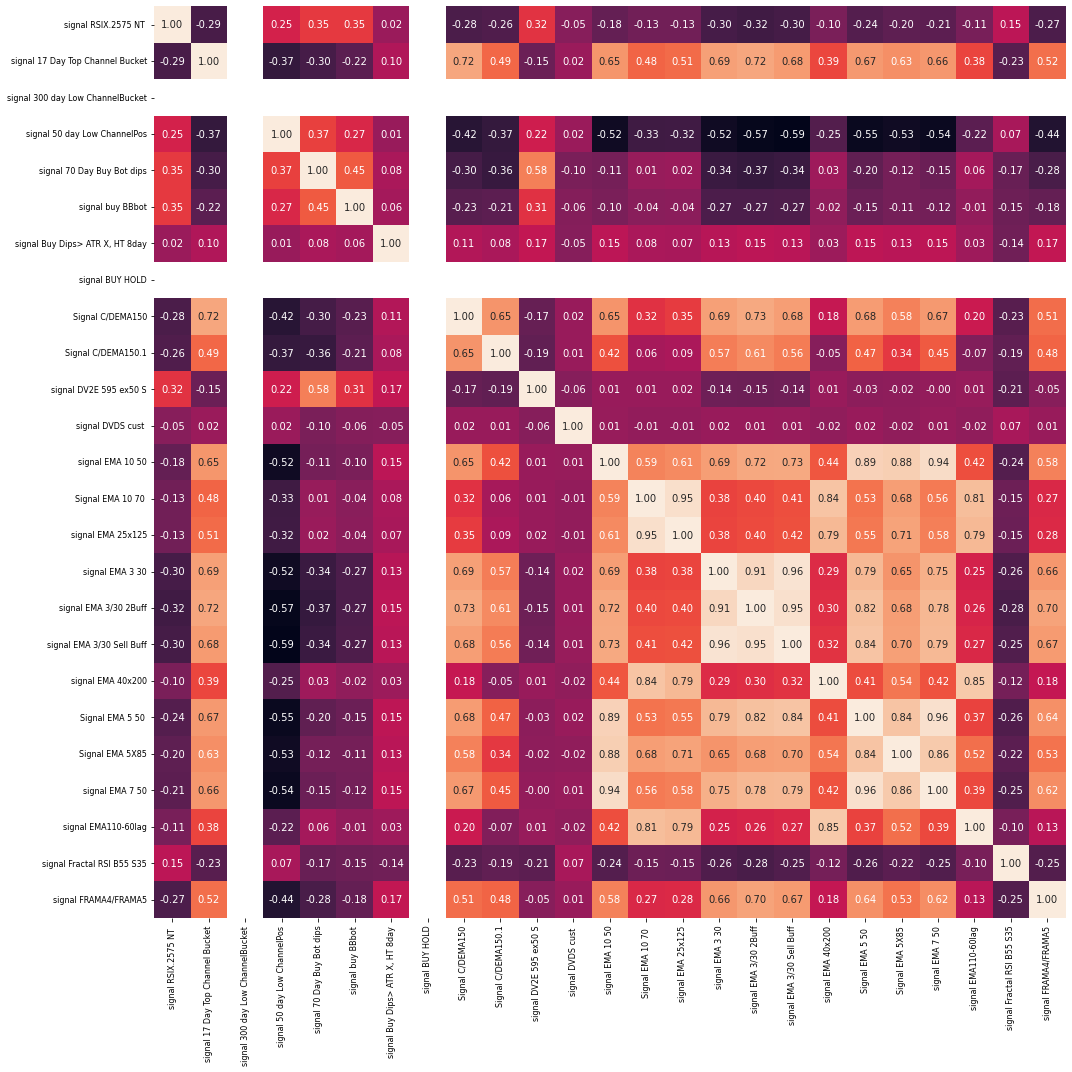

In [13]:
corr =df.corr()
# Get Diagonal Mask. Square matrix is not relevant.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15)) ## here increased figsize

## HERE - max tick font size
ax.tick_params(axis='both', labelsize=8)

#Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr,
                      mask=None,
                       annot=True,
                      fmt='.2f',
                       square=True,
                       cbar=False) ## HERE removed colorbar
f.set_tight_layout(True)

In [14]:
# Printing Absolute values of Correlation
cor_matrix = df.corr().abs()
print(cor_matrix)

                                  signal RSIX.2575 NT   \
signal RSIX.2575 NT                           1.000000   
signal 17 Day Top Channel Bucket              0.292190   
signal 300 day Low ChannelBucket                   NaN   
signal 50 day Low ChannelPos                  0.246236   
signal 70 Day Buy Bot dips                    0.346524   
signal buy BBbot                              0.346830   
signal Buy Dips> ATR X, HT 8day               0.022455   
signal BUY HOLD                                    NaN   
Signal C/DEMA150                              0.275169   
Signal C/DEMA150.1                            0.260846   
signal DV2E 595 ex50 S                        0.322067   
signal DVDS cust                              0.046967   
signal EMA 10 50                              0.177636   
Signal EMA 10 70                              0.128816   
signal EMA 25x125                             0.130014   
signal EMA 3 30                               0.298921   
signal EMA 3/3

In [15]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                  signal RSIX.2575 NT   \
signal RSIX.2575 NT                                NaN   
signal 17 Day Top Channel Bucket                   NaN   
signal 300 day Low ChannelBucket                   NaN   
signal 50 day Low ChannelPos                       NaN   
signal 70 Day Buy Bot dips                         NaN   
signal buy BBbot                                   NaN   
signal Buy Dips> ATR X, HT 8day                    NaN   
signal BUY HOLD                                    NaN   
Signal C/DEMA150                                   NaN   
Signal C/DEMA150.1                                 NaN   
signal DV2E 595 ex50 S                             NaN   
signal DVDS cust                                   NaN   
signal EMA 10 50                                   NaN   
Signal EMA 10 70                                   NaN   
signal EMA 25x125                                  NaN   
signal EMA 3 30                                    NaN   
signal EMA 3/3

C:\Users\DELL\AppData\Local\Temp\ipykernel_9312\3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [16]:
#Dropping correlated columns greater than 0.50
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(); print(to_drop)


['Signal C/DEMA150', 'Signal C/DEMA150.1', 'signal DV2E 595 ex50 S', 'signal EMA 10 50', 'Signal EMA 10 70 ', 'signal EMA 25x125', 'signal EMA 3 30', 'signal EMA 3/30 2Buff', 'signal EMA 3/30 Sell Buff', 'signal EMA 40x200', 'Signal EMA 5 50 ', 'Signal EMA 5X85', 'signal EMA 7 50', 'signal EMA110-60lag', 'signal FRAMA4/FRAMA5']


In [17]:
df1 = df.drop(df.columns[to_drop], axis=1)
print(); print(df1.head())

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:
# printing least correlated columns or signals
df1.to_excel("Corr.xlsx") 

NameError: name 'df1' is not defined